# Clustering Penguins Species 🐧
Dataset Source: https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species
<br><br>
Stanley Nathanael Wijaya - 2702217125

## Task Description

You are a data scientist assigned to work on an ecological study about penguins.
<br><br>
Your task is to develop a clustering model to categorize penguin species based on various physical characteristics and measurements.
<br>
(https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species)
<br><br>
The dataset includes attributes like bill length, bill depth, flipper length, body mass, and perhaps other ecological data.
<ul>
    <li>Train your clustering model on the dataset.</li>
    <li>
    Analyze the clusters formed. Assess how well the clusters correspond to the different species of penguins and interpret the clustering results.
    </li>
</ul>

# Centroid Based Clustering - K-Means Algorithm

## Import Library

In [650]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score

## Load Dataset

In [651]:
df = pd.read_csv("./Dataset/penguins.csv")
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


## EDA

In [652]:
df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [653]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [654]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

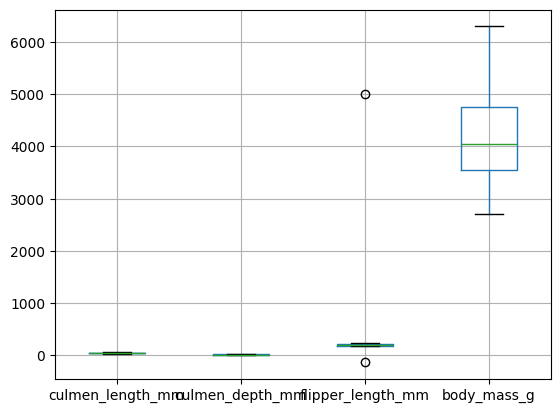

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [655]:
df.boxplot()
plt.show()
df = df.dropna()
df[df["flipper_length_mm"] > 4000]
df[df["flipper_length_mm"] < 0]
penguins_clean = df.drop([9, 14])
penguins_clean.head()

In [656]:
df = pd.get_dummies(penguins_clean).drop("sex_.", axis=1)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


In [657]:
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[features]

## Data Normalization

In [658]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


In [659]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


## Perform PCA

In [660]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
print(n_components)

2


## Clustering

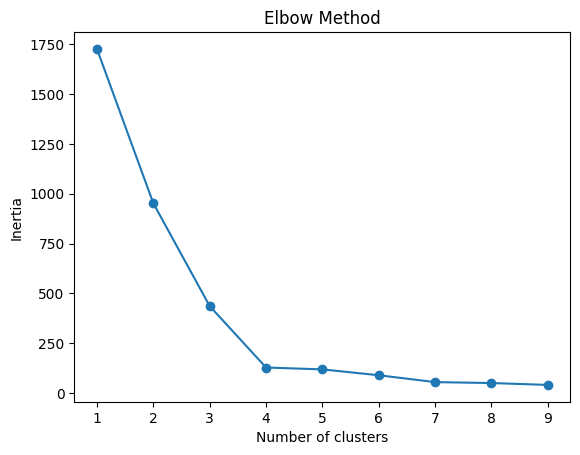

In [661]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

### Manually define the number of cluster

In [662]:
n_clusters = 4

In [663]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(penguins_preprocessed)

kmeans_df = df
kmeans_df['cluster'] = clusters

In [664]:
kmeans_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,cluster
0,39.1,18.7,181.0,3750.0,False,True,0
1,39.5,17.4,186.0,3800.0,True,False,2
2,40.3,18.0,195.0,3250.0,True,False,2
4,36.7,19.3,193.0,3450.0,True,False,2
5,39.3,20.6,190.0,3650.0,False,True,0
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,True,False,3
340,46.8,14.3,215.0,4850.0,True,False,3
341,50.4,15.7,222.0,5750.0,False,True,1
342,45.2,14.8,212.0,5200.0,True,False,3


## Visualization

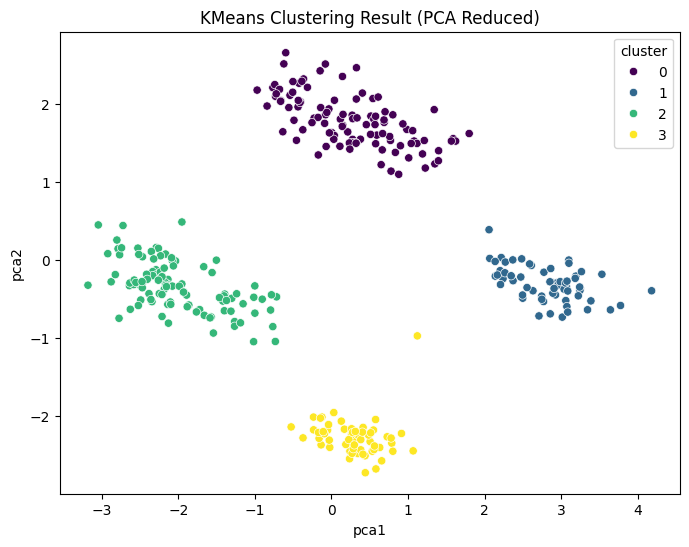

In [665]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(penguins_preprocessed)

df['pca1'] = pca_components[:,0]
df['pca2'] = pca_components[:,1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=kmeans_df, x='pca1', y='pca2', hue='cluster', palette='viridis')
plt.title('KMeans Clustering Result (PCA Reduced)')
plt.show()


## Assume that the first clustering is perfect

In [666]:
true_labels = df['cluster']
ari_score = adjusted_rand_score(true_labels, clusters)

print("Adjusted Rand Index:", ari_score)


Adjusted Rand Index: 1.0


# Hierarchy Clustering

## Import Library

In [667]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


## Dendrogram

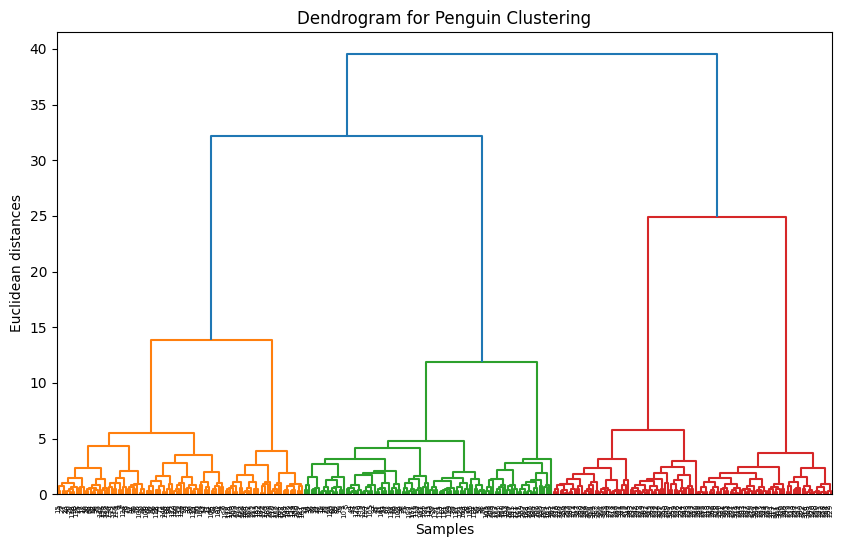

In [668]:
linked = linkage(penguins_preprocessed, method='ward') # complete, average, ward

plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Dendrogram for Penguin Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()


## Clustering + Visualization

In [669]:
clusters_hierarchical = fcluster(linked, 4, criterion='maxclust')
df['cluster_hierarchical'] = clusters_hierarchical


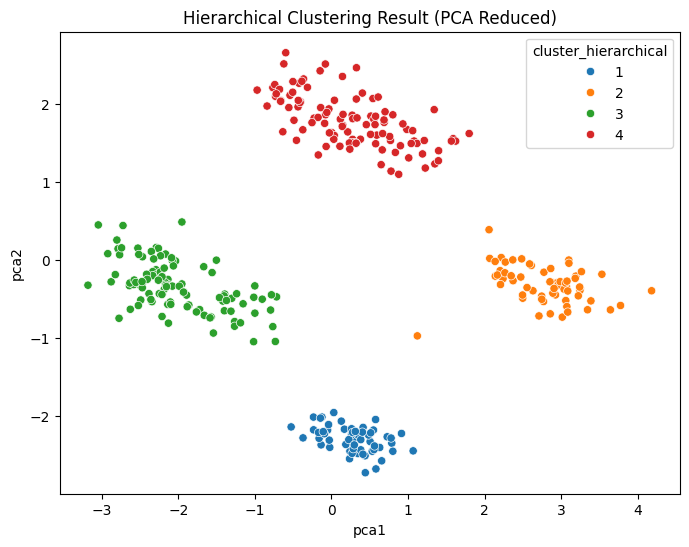

In [670]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(penguins_preprocessed)

df['pca1'] = pca_components[:, 0]
df['pca2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster_hierarchical', palette='tab10')
plt.title('Hierarchical Clustering Result (PCA Reduced)')
plt.show()


## Hierarchy Clustering Evaluation

In [671]:
ari = adjusted_rand_score(df['cluster'], df['cluster_hierarchical'])
print("Adjusted Rand Index (Hierarchical):", ari)

Adjusted Rand Index (Hierarchical): 0.9945047270562278


# Density Based Clustering

## Import Library

In [672]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score


## Clustering + Visualization

In [673]:
for eps in [0.5, 0.8, 1.0]:
    db = DBSCAN(eps=eps, min_samples=5).fit(penguins_preprocessed)
    labels = db.labels_
    print(f"eps={eps}, clusters={len(set(labels)) - (1 if -1 in labels else 0)}, noise={list(labels).count(-1)}")


eps=0.5, clusters=7, noise=86
eps=0.8, clusters=4, noise=6
eps=1.0, clusters=4, noise=3


In [674]:
dbscan = DBSCAN(eps=1, min_samples=15)
clusters_dbscan = dbscan.fit_predict(penguins_preprocessed)

df['cluster_dbscan'] = clusters_dbscan

In [675]:
if 'species' in df.columns:
    ari = adjusted_rand_score(df['species'], clusters_dbscan)
    print("Adjusted Rand Index (DBSCAN):", ari)


In [676]:
if len(set(clusters_dbscan)) > 1:
    sil_score = silhouette_score(penguins_preprocessed, clusters_dbscan)
    print("Silhouette Score (DBSCAN):", sil_score)


Silhouette Score (DBSCAN): 0.5663944251071912


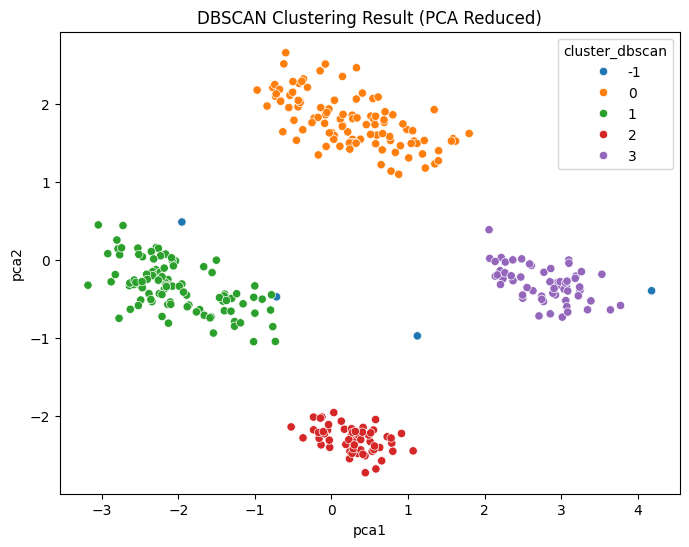

In [677]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(penguins_preprocessed)

df['pca1'] = pca_components[:, 0]
df['pca2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster_dbscan', palette='tab10')
plt.title('DBSCAN Clustering Result (PCA Reduced)')
plt.show()


## Density Based Clustering Evaluation

In [678]:
ari = adjusted_rand_score(df['cluster'], df['cluster_dbscan'])
print("Adjusted Rand Index (Hierarchical):", ari)

Adjusted Rand Index (Hierarchical): 0.9845139824787001


In [679]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,cluster,pca1,pca2,cluster_hierarchical,cluster_dbscan
0,39.1,18.7,181.0,3750.0,False,True,0,-0.729521,2.097192,4,0
1,39.5,17.4,186.0,3800.0,True,False,2,-1.929304,-0.412150,3,1
2,40.3,18.0,195.0,3250.0,True,False,2,-1.953525,-0.308485,3,1
4,36.7,19.3,193.0,3450.0,True,False,2,-2.288178,0.158278,3,1
5,39.3,20.6,190.0,3650.0,False,True,0,-0.621822,2.514020,4,0
...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,True,False,3,0.655653,-2.577632,1,2
340,46.8,14.3,215.0,4850.0,True,False,3,0.562064,-2.387538,1,2
341,50.4,15.7,222.0,5750.0,False,True,1,3.085743,-0.399018,2,3
342,45.2,14.8,212.0,5200.0,True,False,3,0.512527,-2.218491,1,2


## Centroid Based Clustering Evaluation by using Hierarchical Cluster

In [680]:
true_labels = df['cluster']
clusters_hierarchical = df['cluster_hierarchical']
ari_score = adjusted_rand_score(true_labels, clusters_hierarchical)

print("Adjusted Rand Index:", ari_score)

Adjusted Rand Index: 0.9945047270562278


## Final Evaluation

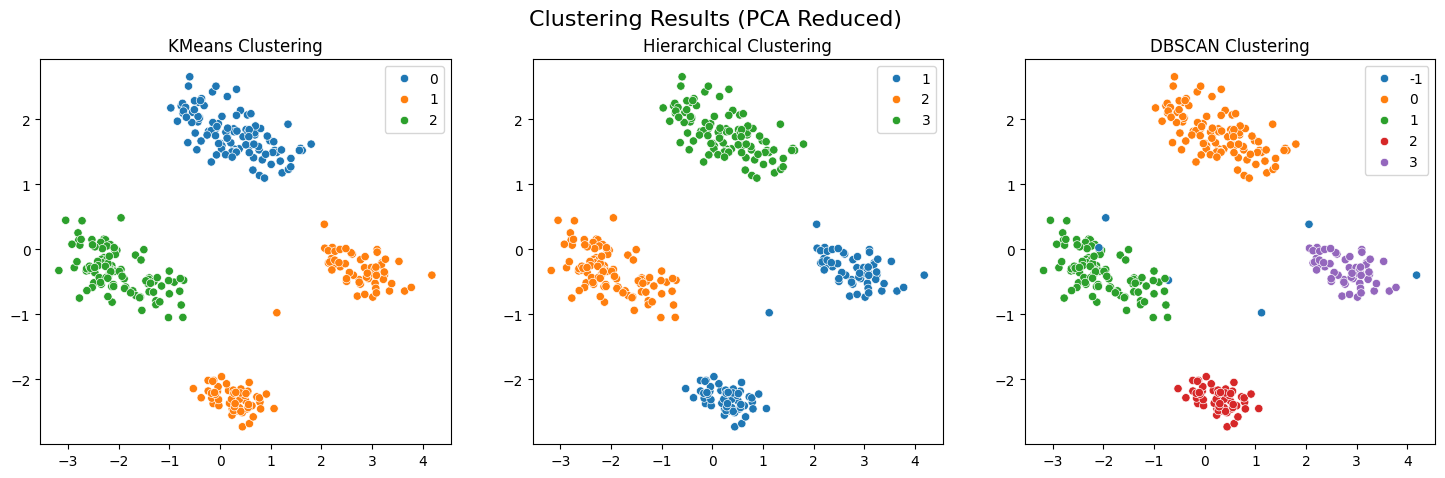


=== Evaluation Summary ===
              Adjusted Rand Index  Silhouette Score
KMeans                      0.846             0.477
Hierarchical                0.846             0.477
DBSCAN                      0.977             0.561


In [681]:
# Ground Truth (but there is no ground truth in the dataset)
true_labels = df['cluster'] if 'cluster' in df.columns else None

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(penguins_preprocessed)

# Clustering
results = {}

# --- KMeans ---
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(penguins_preprocessed)
ari_kmeans = adjusted_rand_score(true_labels, labels_kmeans) if true_labels is not None else None
sil_kmeans = silhouette_score(penguins_preprocessed, labels_kmeans)
results['KMeans'] = {'labels': labels_kmeans, 'ARI': ari_kmeans, 'Silhouette': sil_kmeans}

# --- Hierarchical ---
linked = linkage(penguins_preprocessed, method='ward')
labels_hier = fcluster(linked, 3, criterion='maxclust')
ari_hier = adjusted_rand_score(true_labels, labels_hier) if true_labels is not None else None
sil_hier = silhouette_score(penguins_preprocessed, labels_hier)
results['Hierarchical'] = {'labels': labels_hier, 'ARI': ari_hier, 'Silhouette': sil_hier}

# --- DBSCAN ---
db = DBSCAN(eps=0.8, min_samples=5)
labels_db = db.fit_predict(penguins_preprocessed)
n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)

ari_db = adjusted_rand_score(true_labels, labels_db) if true_labels is not None else None
sil_db = silhouette_score(penguins_preprocessed, labels_db) if len(set(labels_db)) > 1 else None
results['DBSCAN'] = {'labels': labels_db, 'ARI': ari_db, 'Silhouette': sil_db}

# Visualization

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, method in zip(axes, results.keys()):
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=results[method]['labels'], palette='tab10', ax=ax)
    ax.set_title(f"{method} Clustering")

plt.suptitle("Clustering Results (PCA Reduced)", fontsize=16)
plt.show()

# Evaluation Summary

eval_df = pd.DataFrame.from_dict({
    method: {
        'Adjusted Rand Index': round(metrics['ARI'], 3) if metrics['ARI'] is not None else 'N/A',
        'Silhouette Score': round(metrics['Silhouette'], 3) if metrics['Silhouette'] is not None else 'N/A'
    }
    for method, metrics in results.items()
}, orient='index')

print("\n=== Evaluation Summary ===")
print(eval_df)


## Conclusion

| Clustering Method           | Strengths                                                | Weakness                         |
| ---------------- | -------------------------------------------------------- | ---------------------------------- |
| **KMeans**       | Fast and Efficient  | We need to determine the number of cluster   |
| **Hierarchical** | No need `fit_predict` and can be visualize using Dendogram | Tidak scalable untuk dataset besar |
| **DBSCAN**       | Can detect outlier and no need number of cluster | Sensitive with the parameter `eps`  |

## Insights and Analysis

<ol>

<li>Species can Be Predicted Using Physical Measurements
The success of clustering highlights that species identity can be inferred from a small number of ecological measurements, making this a practical approach for ecological field studies.</li>

<li>Potential Discovery of Hidden Structure
The formation of four clusters, despite having only three labeled species, opens opportunities to re-examine class labels or explore intra-species diversity that may have been overlooked.</li>

<li>By using the DB Scan Clustering, we can get the highest Silhouette Score, the insight that we can get are:
    <ul>
        <li>The actual structure of the data does not match the spherical assumption of K-Means.</li>
        <li>There are non-uniform densities, irregular boundaries, or outliers that DBSCAN handles better.</li>
    </ul>
</li>

<li>We can see there are 4 clusters made and I think it is the best number of cluster for the penguin species.</li>

<li>We also can see from the Density Based Clustering where the outlier is not too much, so in my opinion the clustering model respons well to the different species of the penguins.</li>

</ol>